<a href="https://colab.research.google.com/github/EricEsajian/neural_network_models/blob/master/Transfer_Learning_Project_2_TF_Using_Transfer_Hub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STEP #0: PROBLEM STATEMENT  

- Transfer learning is a machine learning technique in which intelligence (i.e.: weights) from a base artificial neural network is being transferred to a new network as a starting point to perform a specific task. 
- Transfer learning is a key skill to acquire as a data scientist since it can dramatically reduce the computational time required if the network is being trained from scratch (i.e.: starting from purely random weights). 
- In this project, we are going to use a trained ANN known as MobileNet that come readily trained/available from TF 2.0 Hub
- We are going to use TensorFlow Flowers dataset 
- This code is based on TensorFlow 2.0 Hub documentation: 
https://www.tensorflow.org/beta/tutorials/images/hub_with_keras


# STEP #1: IMPORT LIBRARIES

In [1]:
import tensorflow as tf

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random 


In [3]:
!pip install tensorflow_hub
import tensorflow_hub as hub


# STEP #2: IMPORT MOBILENET WITH PRE-TRAINED WEIGHTS FROM TF 2.0 HUB

In [0]:
Trained_MobileNet_url ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/2" #@param {type:"string"}

In [5]:
Trained_MobileNet = tf.keras.Sequential([
    hub.KerasLayer(Trained_MobileNet_url, input_shape=(224,224,3))])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


# STEP #3: EVALUATE PRE-TRAINED MOBILENET (JUST TO BE SURE :)!)

- Check this out: http://www.image-net.org/synset?wnid=n02835271
- Search for Bicycle
- https://lear.inrialpes.fr/people/gordo/ImageNetResults/sift1000_accuracy_withPrior/results_sift_0253.htm

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
Sample_Image= tf.keras.preprocessing.image.load_img(r'/content/drive/My Drive/Colab Notebooks/Transfer Learning Data/watch.jpg', target_size = (224, 224))

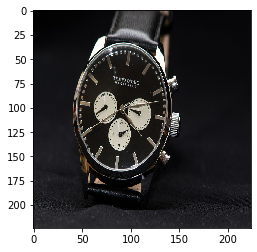

In [9]:
plt.imshow(Sample_Image)

In [0]:
Sample_Image = np.array(Sample_Image)/255.0


In [0]:
predicted_class = Trained_MobileNet.predict(np.expand_dims(Sample_Image, axis = 0))

In [12]:
predicted_class

array([[ 0.31979933,  0.7227179 , -0.46497566, ...,  0.25369614,
        -1.4674318 , -0.00161375]], dtype=float32)

In [13]:
predicted_class.shape

(1, 1001)

In [14]:
predicted_class = np.argmax(predicted_class)
predicted_class

827

In [15]:
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

16384/10484 [==============================================] - 0s 0us/step


Text(0.5, 1.0, 'Predicted Class is: Stopwatch')

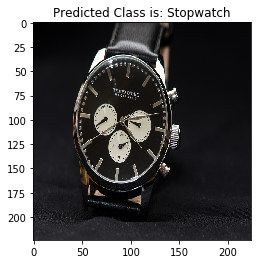

In [16]:
plt.imshow(Sample_Image)
predicted_class_name = imagenet_labels[predicted_class]
plt.title("Predicted Class is: " + predicted_class_name.title())

# STEP #4: LET'S TEST THE MODEL ON A BATCH OF IMAGES

In [17]:
# Specify path of the flowers dataset
flowers_data_url = tf.keras.utils.get_file(
  'flower_photos','https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
   untar=True)

228818944/228813984 [==============================] - 4s 0us/step


In [18]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
flowers_data = image_generator.flow_from_directory(str(flowers_data_url), target_size=(224,224), batch_size = 64, shuffle = True)

Found 3670 images belonging to 5 classes.


In [19]:
for flowers_data_input_batch, flowers_data_label_batch in flowers_data:
  print("Image batch shape: ", flowers_data_input_batch.shape)
  print("Label batch shape: ", flowers_data_label_batch.shape)
  break

Image batch shape:  (64, 224, 224, 3)
Label batch shape:  (64, 5)


In [20]:
predictions_batch = Trained_MobileNet.predict(flowers_data_input_batch)
predictions_batch.shape

(64, 1001)

In [21]:
predicted_class_names = imagenet_labels[np.argmax(predictions_batch, axis=-1)]
predicted_class_names

array(['daisy', 'bell pepper', 'sea urchin', 'pot', 'cardoon', 'daisy',
       'picket fence', 'stinkhorn', 'pineapple', 'shield', 'bee', 'vase',
       'bubble', 'daisy', 'daisy', 'spider web', 'rapeseed', 'cardoon',
       'bee', 'daisy', 'cabbage butterfly', 'daisy', 'cardoon',
       'picket fence', 'white stork', 'limpkin', 'coil',
       'Bedlington terrier', 'daisy', 'birdhouse', 'daisy', 'daisy',
       'vase', 'daisy', 'altar', 'picket fence', 'daisy', 'daisy',
       'spindle', 'coral fungus', 'rapeseed', 'altar', 'chickadee',
       'daisy', 'corn', 'vase', 'daisy', 'ant', 'daisy', 'bee', 'coil',
       'feather boa', 'daisy', 'coil', 'cabbage butterfly', 'pot', 'mask',
       'daisy', 'daisy', 'dough', 'sea urchin', 'passenger car',
       'cardoon', 'hip'], dtype='<U30')

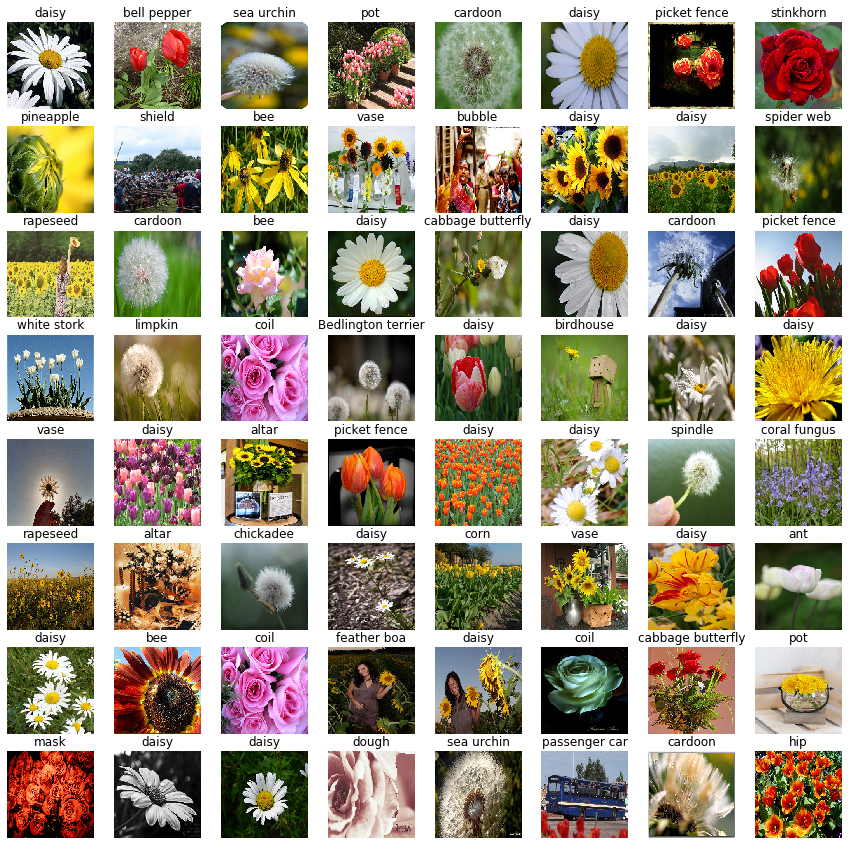

In [22]:
plt.figure(figsize=(15,15))

for n in range(64):
  plt.subplot(8,8,n+1)
  plt.imshow(flowers_data_input_batch[n])
  plt.title(predicted_class_names[n])
  plt.axis('off')

# Network performance is poor because it wasn't even trained to clasify these types of flowers!

# STEP #5: APPLY TRANSFER LEARNING AND RETRAIN THE MODEL

You can download the MobileNet without the classification head:
https://tfhub.dev/s?module-type=image-feature-vector&q=tf2


In [0]:
MobileNet_feature_extractor_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/2" #@param {type:"string"}

In [0]:
MobileNet_feature_extractor_layer = hub.KerasLayer(MobileNet_feature_extractor_url, input_shape=(224, 224, 3))

In [25]:
feature_batch = MobileNet_feature_extractor_layer(flowers_data_input_batch)
print(feature_batch.shape)

(64, 1280)


In [0]:
MobileNet_feature_extractor_layer.trainable = False

In [27]:
flowers_data.num_classes

5

In [28]:
# Build a model with two pieces:
#    (1)  MobileNet Feature Extractor 
#    (2)  Dense Network (classifier) added at the end 

model = tf.keras.Sequential([
  MobileNet_feature_extractor_layer,
  tf.keras.layers.Dense(flowers_data.num_classes, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [0]:
predictions = model(flowers_data_input_batch)

In [30]:
predictions.shape

TensorShape([Dimension(64), Dimension(5)])

In [0]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
history = model.fit_generator(flowers_data, epochs=50)

Epoch 1/50
58/58 [==============================] - 13s 226ms/step - loss: 0.7401 - acc: 0.7368
Epoch 2/50
58/58 [==============================] - 13s 221ms/step - loss: 0.3764 - acc: 0.8793
Epoch 3/50
58/58 [==============================] - 13s 219ms/step - loss: 0.2987 - acc: 0.9084
Epoch 4/50
58/58 [==============================] - 13s 218ms/step - loss: 0.2584 - acc: 0.9183
Epoch 5/50
58/58 [==============================] - 13s 218ms/step - loss: 0.2267 - acc: 0.9322
Epoch 6/50
58/58 [==============================] - 13s 218ms/step - loss: 0.2022 - acc: 0.9417
Epoch 7/50
58/58 [==============================] - 13s 225ms/step - loss: 0.1861 - acc: 0.9515
Epoch 8/50
58/58 [==============================] - 13s 220ms/step - loss: 0.1675 - acc: 0.9564
Epoch 9/50
58/58 [==============================] - 13s 219ms/step - loss: 0.1543 - acc: 0.9616
Epoch 10/50
58/58 [==============================] - 13s 221ms/step - loss: 0.1450 - acc: 0.9621
Epoch 11/50
58/58 [====================

In [33]:
for i, layer in enumerate(model.layers):
    print(i, layer.name)

0 keras_layer_1
1 dense


# STEP #6: EVALUATE THE MODEL

In [34]:
class_names = sorted(flowers_data.class_indices.items(), key=lambda pair:pair[1])
class_names = np.array([key.title() for key, value in class_names])
class_names

array(['Daisy', 'Dandelion', 'Roses', 'Sunflowers', 'Tulips'],
      dtype='<U10')

In [0]:
predicted_batch = model.predict(flowers_data_input_batch)
predicted_id = np.argmax(predicted_batch, axis=-1)
predicted_label_batch = class_names[predicted_id]

In [0]:
label_id = np.argmax(flowers_data_input_batch, axis=-1)

In [38]:
label_id

array([[[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 1, 2, 2],
        [2, 2, 2, ..., 1, 2, 2]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 1, 1, ..., 0, 0, 0],
        [0, 1, 1, ..., 0, 0, 0],
        [0, 1, 1, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        ...,
        [1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 1, 2, 0],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 2],
        ...,
        [0, 0, 0, ..., 

ValueError: ignored

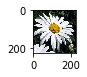

In [39]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)

for n in range(64):
  plt.subplot(8,8,n+1)
  plt.imshow(flowers_data_input_batch[n])
  color = "green" if predicted_id[n] == label_id[n] else "red"
  plt.title(predicted_label_batch[n].title(), color=color)
  plt.axis('off')
